In [1]:
using BSON: @save
using BSON: @load
using CSV
using DataFrames: DataFrame
using Flux
using Flux: logitbinarycrossentropy, binarycrossentropy, BatchNorm
using Flux.Data: DataLoader
using Flux: chunk
using ImageFiltering
using MLDatasets: FashionMNIST
using ProgressMeter: Progress, next!
using Random
using Zygote
using MLDatasets
using Images
using ImageIO
using LinearAlgebra
using FFTW

using NBInclude
@nbinclude("src/functions.ipynb")

All function imported


In [4]:

function load_model_identity(load_dir::String, epoch::Int)
    print("Loading model...")
    @load joinpath(load_dir, "model-$epoch.bson") encoder_μ encoder_logvar decoder
    println("Done")
    return encoder_μ, encoder_logvar, decoder
end

function get_test_loader(batch_size, shuffle::Bool)
    # The FashionMNIST test set is made up of 10k 28 by 28 greyscale images
    test_x, test_y = MNIST(split=:test)[:]
    test_x = 1 .- reshape(test_x, (784, :))
    return DataLoader((test_x, test_y), batchsize=batch_size, shuffle=shuffle)
end



get_test_loader (generic function with 1 method)

In [20]:
using NBInclude
@nbinclude("src/functions.ipynb")
epoch_to_load = 100
# Load the model and test set loader
dir = "trained_GNN/test/trained_GNN/MNIST_ML"
encoder_μ, encoder_logvar, decoder = load_model_identity(dir, epoch_to_load);


batch_size = 64; shuffle = true
dataloader = get_test_loader(batch_size, shuffle)
(x_batch, y_batch) = first(dataloader)



m = rand(1:784)
F_sub = sample_fourier(m, 784)
y_sub = F_sub*x_batch
y = vcat(y_sub, zeros(784-m, batch_size))

# Forward propagate through mean encoder and std encoders
μ = encoder_μ(y)
logvar = encoder_logvar(y)
# Apply reparameterisation trick to sample latent
z = μ + randn(Float32, size(logvar)) .* exp.(0.5f0 * logvar)
# Reconstruct from latent sample
x̂ =  decoder(z)




All function imported
Loading model...Done


784×64 Matrix{Float64}:
 0.999991  0.999999  0.999851  0.999984  …  0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999999  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984  …  0.999998  0.999357  0.994841
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984  …  0.999998  0.999357  0.994842
 0.999991  0.999999  0.999851  0.999984     0.999998  0.999357  0.994842
 0.999989  0.999999  0.999859  0.999981     0.999998  0.999221  0.994667
 ⋮                         

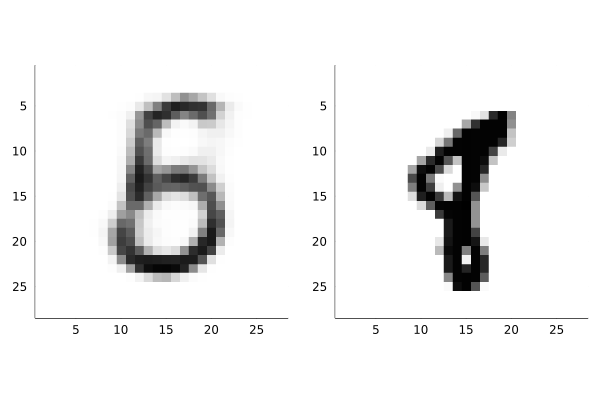

In [22]:
i = 50

p1 = plot(colorview(Gray, reshape(x̂[:,i], 28, 28)' ))
p2 = plot(colorview(Gray, reshape(x_batch[:,i], 28, 28)'))

plot(p1,p2, layout = grid(1,2))

In [19]:
m

318